# Results simulated data

In [1]:
import mne
import mne.io
import numpy as np
import matplotlib.pyplot as plt
from mne_methods import *
from mne.preprocessing import ICA
import warnings
import timeit
import os

## Loading, preprocessing and visually inspecting the data

In [5]:
def load_preprocess_plot(file, data_path):
    # load data
    raw_all = load_mne.file_to_raw(data_path)
    
    # preprocess and filter data
    raw_filtered, nans_filt = load_mne.preprocess(raw_all.copy())
    
    # plot data
    raw_filtered.plot(title = file)
    
    return raw_filtered, nans_filt

In [10]:
# load, preprocess and plot
file = 'EEG_sim_100-25cha_noise_50noise_75'
data_folder = r"C:\Users\malen\Desktop\EEG_data\\" 
data_path = data_folder + file + ".mat"
raw, nans = load_preprocess_plot(file, data_path)

## ICA and plot of sources on interval

In [8]:
# cropping a 30-second interval
int_start = 10
raw_crop = raw.copy().crop(tmin=int_start, tmax=int_start + 30).pick_types(eeg=True)
raw_crop.plot(title = file + f", int_start = {int_start}")

In [9]:
# running ICA
n_comp = 4
ica_components = ICA(n_components=n_comp, max_iter='auto', method='fastica', random_state=97, verbose=False)
ica_components.fit(raw_crop, verbose=False)
# plotting sources
ica_components.plot_sources(raw_crop)

## Multiple ICAs on 2-25 components + M_idx & M_max plot of um and mm

In [11]:
# running multiple ICA and saving estimated components
ICA_subfunctions.multiple_ica(raw_crop, 2, 25, data_folder)
# plotting and saving all um and mm + M_idx & M_max plot of um and mm
ICA_subfunctions.multi_plot(2, 25, data_folder)

<Figure size 640x480 with 0 Axes>

## M_idx & M_max for unmixing and mixing matrices

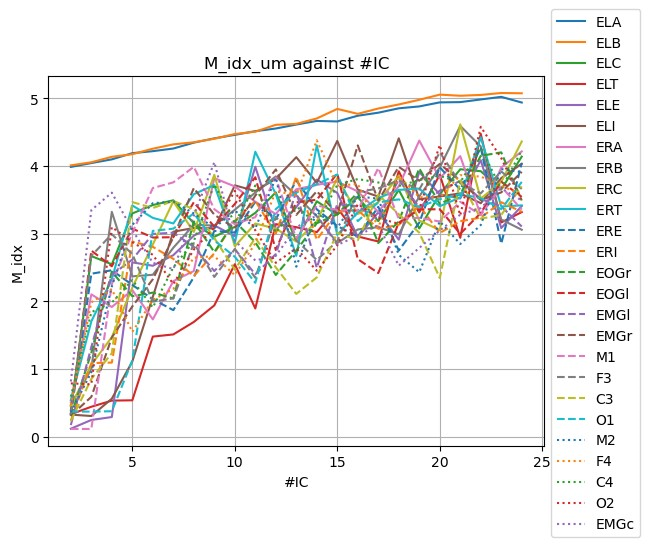
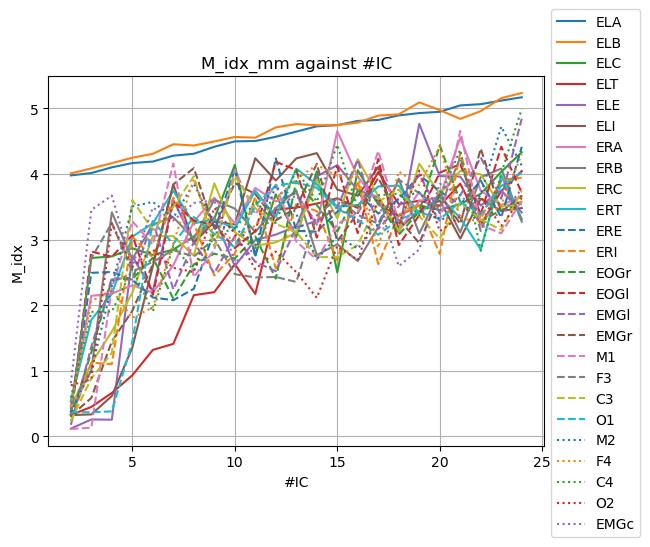
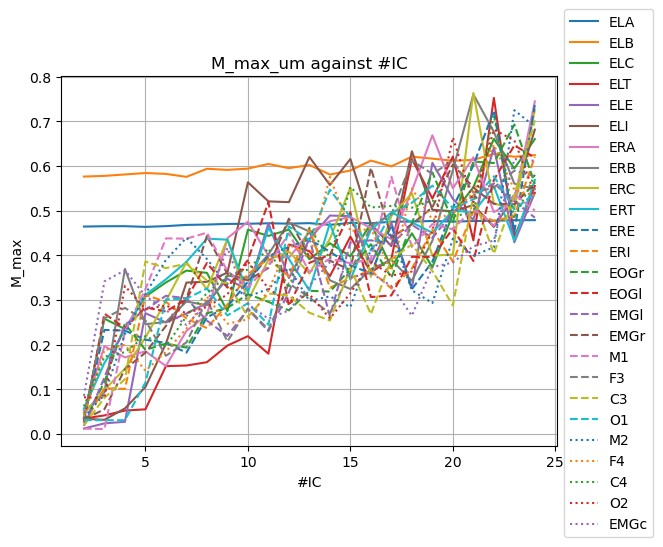
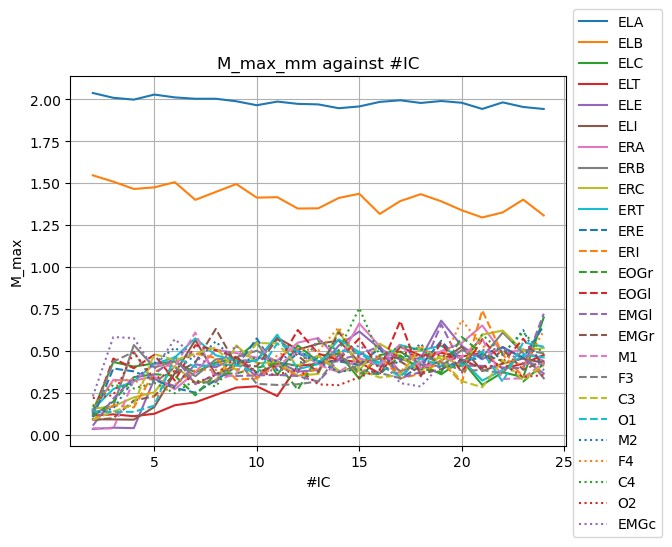